Which algorithms are sensitive to outliers?

1. Naive Bayes: Not sensitive
2. Linear Regression: Sensitive
3. Logistic Regression: Sensitive
4. SVM: Not Sensitive
5. Decision Trees: Not sensitive
6. Ensemble Trees: Not sensitive
7. KNN: Not sensitive
8. K-Means: Sensitive
9. Hierarichal: Sensitive
10. PCA: Sensitive
11. Neural networks: Sensitive

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
import seaborn as sns
sns.distplot(df['Age'].dropna())

<AxesSubplot:xlabel='Age'>

<AxesSubplot:xlabel='Age'>

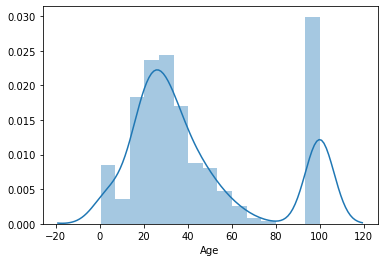

In [5]:
##adding an outlier
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'Amount of passengers')

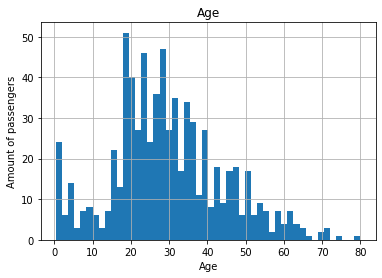

In [6]:
##we can see that the distribution is skewed
fig = df.Age.hist(bins=50)
fig.set_title('Age')
fig.set_xlabel('Age')
fig.set_ylabel('Amount of passengers')

<AxesSubplot:>

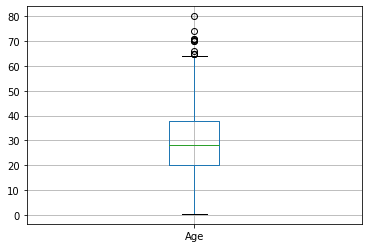

In [7]:
df.boxplot('Age')

In [8]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Feature not skewed
- we can use the boundaries based on the mean and 3 standar deviations to eliminate outliers
- we can use IQR to eliminate the outliers

In [9]:
## Assuming Age follows a Gaussian Distribution
df['Age'].mean()

max_boundary = df['Age'].mean() + 3*df['Age'].std()
min_boundary = df['Age'].mean() - 3*df['Age'].std()

In [10]:
min_boundary,max_boundary

(-13.88037434994331, 73.27860964406095)

In [11]:
## Compute the IQR
q3 = df.Age.quantile(.75)
q1 = df.Age.quantile(.25)
iqr = q3-q1

In [12]:
lower_bridge = q1 - 1.5*iqr
upper_bridge = q3 + 1.5*iqr
lower_bridge,upper_bridge

(-6.6875, 64.8125)

### Feature is skewed
- we can use the IQR but considering extreme values by multiplying the IQR by 3 or more in order to capture the outliers

Text(0, 0.5, 'Amount of passengers')

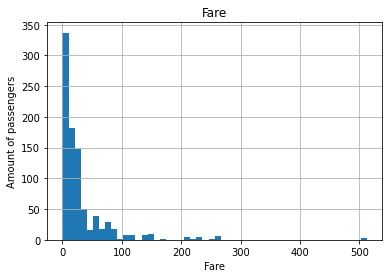

In [13]:
##we can see that the distribution is skewed
fig = df.Fare.hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel('Fare')
fig.set_ylabel('Amount of passengers')

<AxesSubplot:>

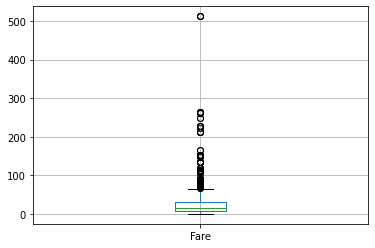

In [14]:
df.boxplot('Fare')

In [15]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [16]:
## Compute the IQR
q3 = df.Fare.quantile(.75)
q1 = df.Fare.quantile(.25)
iqr = q3-q1

In [17]:
lower_bridge = q1 - 3*iqr
upper_bridge = q3 + 3*iqr
lower_bridge,upper_bridge

(-61.358399999999996, 100.2688)

In [18]:
data=df.copy()

### Removing the outliers considering the extreme values for Age and Fare

In [19]:
##wherever Age is greater than 73, replace by 73
data['Age']=[73 if age > max_boundary else age for age in data.Age]

In [20]:
data['Fare']=[100 if fare > upper_bridge else fare for fare in data.Fare]

### Train a model

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=.3,random_state=42)

In [22]:
##Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred1 = lr.predict_proba(x_test)

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy Score: ', accuracy_score(y_test,y_pred))
print('ROC_AUC_Score: ', roc_auc_score(y_test,y_pred1[:,1]))

Accuracy Score:  0.6791044776119403
ROC_AUC_Score:  0.7471452344063809
